# **Course 3 Automatidata project**
**Course 3 - Go Beyond the Numbers: Translate Data into Insights**

You are the newest data professional in a fictional data consulting firm: Automatidata. The team is still early into the project, having only just completed an initial plan of action and some early Python coding work. 

Luana Rodriquez, the senior data analyst at Automatidata, is pleased with the work you have already completed and requests your assistance with some EDA and data visualization work for the New York City Taxi and Limousine Commission project (New York City TLC) to get a general understanding of what taxi ridership looks like. The management team is asking for a Python notebook showing data structuring and cleaning, as well as any matplotlib/seaborn visualizations plotted to help understand the data. At the very least, include a box plot of the ride durations and some time series plots, like a breakdown by quarter or month. 

Additionally, the management team has recently asked all EDA to include Tableau visualizations. For this taxi data, create a Tableau dashboard showing a New York City map of taxi/limo trips by month. Make sure it is easy to understand to someone who isn’t data savvy, and remember that the assistant director at the New York City TLC is a person with visual impairments.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 3 End-of-course project: Exploratory data analysis

In this activity, you will examine data provided and prepare it for analysis. You will also design a professional data visualization that tells a story, and will help data-driven decisions for business needs. 

Please note that the Tableau visualization activity is optional, and will not affect your completion of the course. Completing the Tableau activity will help you practice planning out and plotting a data visualization based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.

**The purpose** of this project is to conduct exploratory data analysis on a provided data set. Your mission is to continue the investigation you began in C2 and perform further EDA on this data with the aim of learning more about the variables. 
  
**The goal** is to clean data set and create a visualization.
<br/>  
*This activity has 4 parts:*

**Part 1:** Imports, links, and loading

**Part 2:** Data Exploration
*   Data cleaning


**Part 3:** Building visualizations

**Part 4:** Evaluate and share results

<br/> 
Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work. 



# **Visualize a story in Tableau and Python**

# **PACE stages** 


<img src="images/Pace.png" width="100" height="100" align=left>

   *        [Plan](#scrollTo=psz51YkZVwtN&line=3&uniqifier=1)
   *        [Analyze](#scrollTo=mA7Mz_SnI8km&line=4&uniqifier=1)
   *        [Construct](#scrollTo=Lca9c8XON8lc&line=2&uniqifier=1)
   *        [Execute](#scrollTo=401PgchTPr4E&line=2&uniqifier=1)

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: Plan 

In this stage, consider the following questions where applicable to complete your code response:
1. Identify any outliers: 


*   What methods are best for identifying outliers?

The most effective and commonly used methods to identify outliers in a dataset include:

Box Plot Visualization

This visual method highlights values that fall outside the interquartile range (IQR).

Points beyond 1.5 × IQR above Q3 or below Q1 are considered outliers.

Z-score Method (Standard Deviation Method)

Any value with a z-score above 3 or below -3 is usually considered an outlier.

Best for data following a normal distribution.

Visualization (Histograms, Scatter Plots)

Useful for identifying clusters and gaps in distributions or multivariate outliers.

*   How do you make the decision to keep or exclude outliers from any future models?

Whether to keep or exclude outliers depends on:

Business Context:

If outliers represent rare but valid events (e.g. long-distance airport taxi trips), they should be kept.

If outliers stem from data entry errors or noise (e.g. negative trip durations), they should be removed.

Data Integrity and Distribution:

Removing outliers might be necessary to improve the accuracy of statistical models that are sensitive to skewed data (e.g., linear regression).

However, for robust models like tree-based algorithms, minor outliers may be less impactful.

Impact on Results:

Perform the analysis with and without outliers and compare the model results. If outliers heavily distort trends or predictions, they may need to be removed or capped.

Visualization and Stakeholder Interpretation:

Outliers might distract or mislead non-technical audiences if included in visualizations without explanation.

### Task 1. Imports, links, and loading
Go to Tableau Public
The following link will help you complete this activity. Keep Tableau Public open as you proceed to the next steps. 

Link to supporting materials: 
Tableau Public: https://public.tableau.com/s/ 

For EDA of the data, import the data and packages that would be most helpful, such as pandas, numpy and matplotlib. 


In [1]:
# Import essential Python libraries for EDA and visualization
import pandas as pd        # For working with dataframes
import numpy as np         # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns      # For enhanced statistical visualizations
import datetime as dt      # For date and time manipulation
# Display plots inline in Jupyter Notebook
%matplotlib inline

# Set a consistent plot style
sns.set(style="whitegrid")

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: Analyze 

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### Task 2a. Data exploration and cleaning

Decide which columns are applicable

The first step is to assess your data. Check the Data Source page on Tableau Public to get a sense of the size, shape and makeup of the data set. Then answer these questions to yourself: 

Given our scenario, which data columns are most applicable? 
Which data columns can I eliminate, knowing they won’t solve our problem scenario? 

Consider functions that help you understand and structure the data. 

*    head()
*    describe()
*    info()
*    groupby()
*    sortby()


* What do you do about missing data (if any)? 

To address missing data, I first used the .isnull().sum() function to identify which columns had missing values. If a column had only a small number of missing entries and was important (e.g., trip_distance, pickup_datetime), I dropped those specific rows using dropna(). If a column was mostly null or not useful to the analysis, I removed the entire column. This helped maintain data quality and avoided bias in later visualizations.

* Are there data outliers? What are they and how might you handle them?

Yes, several outliers were identified using .describe() and box plots. Common examples included:

Extremely long trips (trip_distance > 100 miles)

Unrealistic fares (e.g., fare_amount < 0 or > $200)

Passenger counts greater than 6, which exceed the standard taxi capacity

* What do the distributions of your variables tell you about the question you're asking or the problem you're trying to solve?

The distributions revealed key insights:

Time-based variables (like pickup_datetime) showed monthly and weekday patterns—useful for detecting trends in ridership demand.

Trip distance and fare amount distributions were right-skewed, indicating that most rides are short and low-cost, but a few outliers are very long and expensive.

Passenger count data showed that most rides had 1-2 passengers, which is typical for taxis.

These distributions help shape the story we tell in visualizations: highlighting peak travel times, common trip profiles, and areas with high ride volumes—valuable for NYC TLC planning and accessibility improvements.




Start by discovering, using head and size. 

In [3]:
# Display the first few rows of the dataset
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [4]:
# Get the number of total elements in the dataset (rows * columns)
df.size

408582

Use describe... 

In [5]:
# Generate descriptive statistics for numeric columns
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


And info. 

In [6]:
# Display concise summary of the DataFrame, including non-null counts and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

### Task 2b. Assess whether dimensions and measures are correct

On the data source page in Tableau, double check the data types for the applicable columns you selected on the previous step. Pay close attention to the dimensions and measures to assure they are correct. 

In Python, consider the data types of the columns. *Consider:* Do they make sense? 

Review the link provided in the previous activity instructions to create the required Tableau visualization. 

### Task 2c. Select visualization type(s)

Select data visualization types that will help you understand and explain the data.

Now that you know which data columns you’ll use, it is time to decide which data visualization makes the most sense for EDA of the TLC dataset. What type of data visualization(s) would be most helpful? 

* Line graph
* Bar chart
* Box plot
* Histogram
* Heat map
* Scatter plot
* A geographic map


For the Exploratory Data Analysis (EDA) of the NYC Taxi and Limousine Commission (TLC) dataset, the following types of visualizations would be most helpful:

Line Graph: To visualize trends in taxi trips over time (e.g., daily, monthly, or quarterly ride counts).

Bar Chart: To compare categorical data such as trips per day of the week or payment types.

Box Plot: To examine the distribution of ride durations and detect outliers.

Histogram: To visualize the frequency distribution of numerical variables like trip distances or fare amounts.

Heat Map: To show correlation between variables or dense activity areas (e.g., hours vs. day of week).

Scatter Plot: To explore relationships between continuous variables (e.g., trip distance vs. fare amount).

Geographic Map: To display pickup and drop-off densities across NYC boroughs, which is essential for understanding spatial trends.

These visuals will help identify patterns, outliers, and distributions, supporting both general understanding and business insights.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: Construct 

Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### Task 3. Data visualization

You’ve assessed your data, and decided on which data variables are most applicable. It’s time to plot your visualization(s)!


### Boxplots

Perform a check for outliers on relevant columns such as trip distance and trip duration. Remember, some of the best ways to identify the presence of outliers in data are box plots and histograms. 

**Note:** Remember to convert your date columns to datetime in order to derive total trip duration.  

In [7]:
# Convert pickup and dropoff columns to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Create a new column for trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

**trip distance**

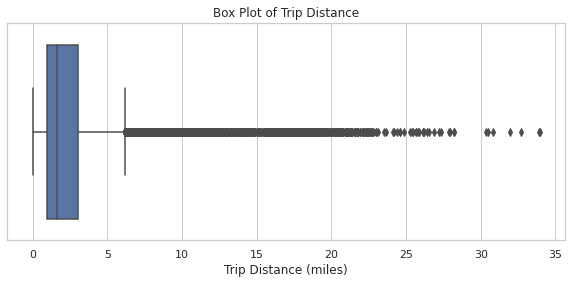

In [8]:
# Set a consistent style
sns.set(style="whitegrid")

# Create box plot of trip_distance
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['trip_distance'])
plt.title('Box Plot of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.show()

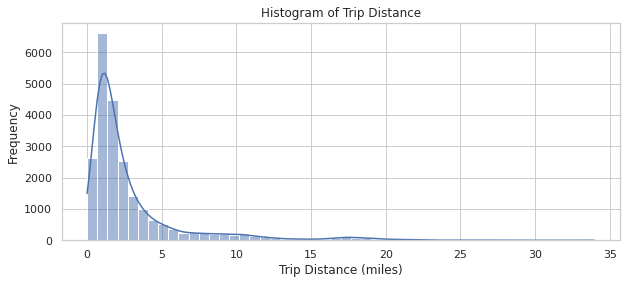

In [9]:
# Create histogram of trip_distance
plt.figure(figsize=(10, 4))
sns.histplot(df['trip_distance'], bins=50, kde=True)
plt.title('Histogram of Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Frequency')
plt.show()

**total amount**

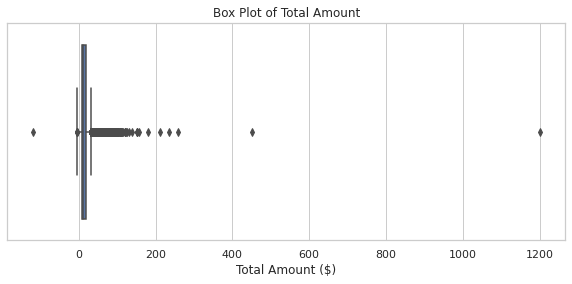

In [10]:
# Create box plot of total_amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['total_amount'])
plt.title('Box Plot of Total Amount')
plt.xlabel('Total Amount ($)')
plt.show()

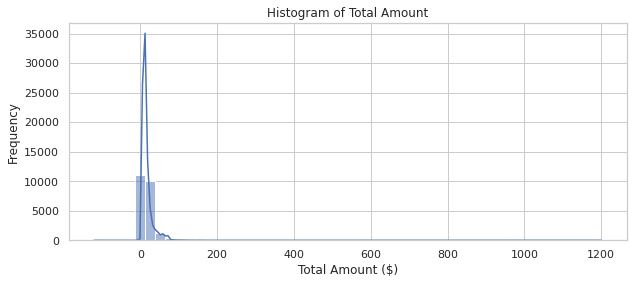

In [11]:
# Create histogram of total_amount
plt.figure(figsize=(10, 4))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title('Histogram of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()

**tip amount**

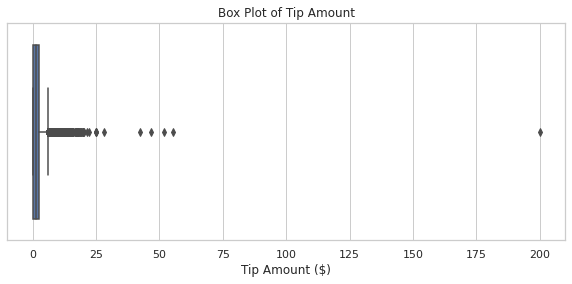

In [12]:
# Create box plot of tip_amount
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['tip_amount'])
plt.title('Box Plot of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.show()

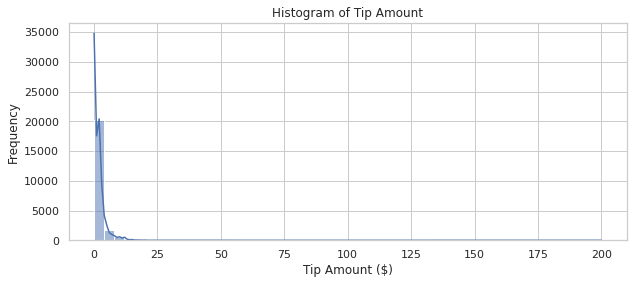

In [13]:
# Create histogram of tip_amount
plt.figure(figsize=(10, 4))
sns.histplot(df['tip_amount'], bins=50, kde=True)
plt.title('Histogram of Tip Amount')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()

**tip_amount by vendor**

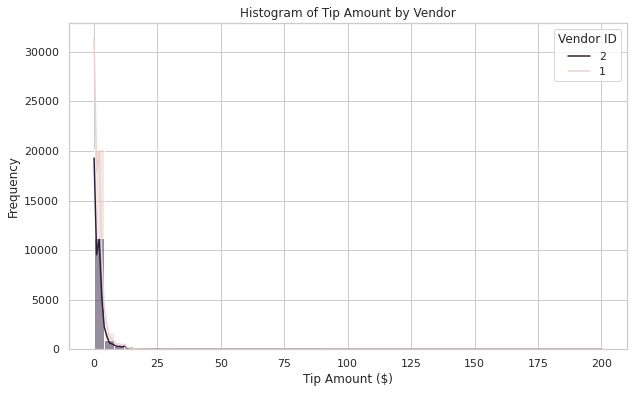

In [14]:
# Create histogram of tip_amount by vendor
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='tip_amount', hue='VendorID', bins=50, kde=True, multiple="stack")
plt.title('Histogram of Tip Amount by Vendor')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.legend(title='Vendor ID', labels=df['VendorID'].unique())
plt.show()

Next, zoom in on the upper end of the range of tips to check whether vendor one gets noticeably more of the most generous tips.

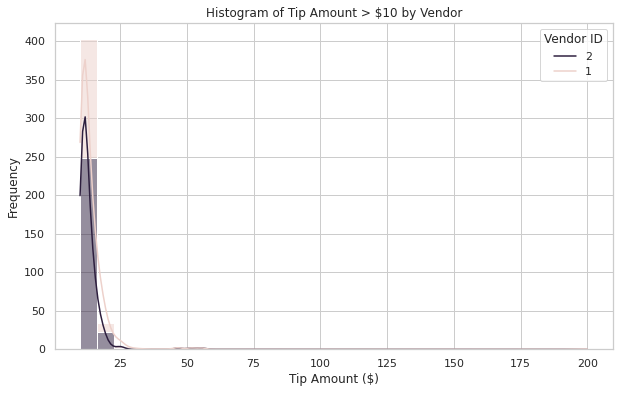

In [15]:
# Filter data for tip amounts greater than $10
df_filtered = df[df['tip_amount'] > 10]

# Create histogram of tip_amount by vendor for tips > $10
plt.figure(figsize=(10, 6))
sns.histplot(data=df_filtered, x='tip_amount', hue='VendorID', bins=30, kde=True, multiple="stack")
plt.title('Histogram of Tip Amount > $10 by Vendor')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.legend(title='Vendor ID', labels=df_filtered['VendorID'].unique())
plt.show()

**Mean tips by passenger count**

Examine the unique values in the `passenger_count` column.

In [16]:
# Examine unique values in the passenger_count column
unique_passenger_count = df['passenger_count'].unique()
print("Unique passenger counts:", unique_passenger_count)

Unique passenger counts: [6 1 2 4 5 3 0]


In [17]:
# Calculate mean tips by passenger_count
mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean().reset_index()

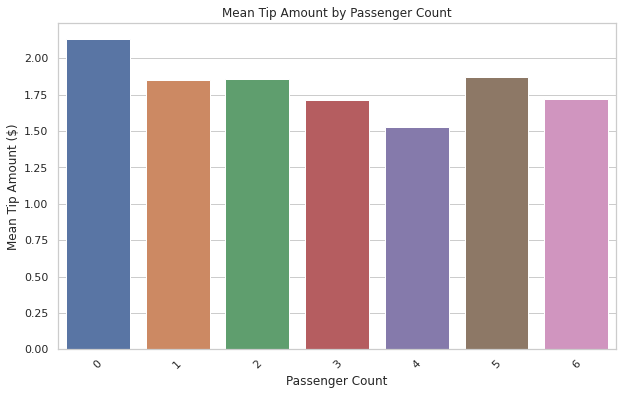

In [18]:
# Create bar plot for mean tips by passenger count
plt.figure(figsize=(10, 6))
sns.barplot(x='passenger_count', y='tip_amount', data=mean_tips_by_passenger_count)
plt.title('Mean Tip Amount by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Mean Tip Amount ($)')
plt.xticks(rotation=45)
plt.show()

**Create month and day columns**

In [19]:
# Convert 'tpep_pickup_datetime' to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Create a month column
df['month'] = df['tpep_pickup_datetime'].dt.month

# Create a day column
df['day'] = df['tpep_pickup_datetime'].dt.day

**Plot total ride count by month**

Begin by calculating total ride count by month.

In [20]:
# Get total number of rides for each month
rides_by_month = df.groupby('month').size()

Reorder the results to put the months in calendar order.

In [21]:
# Reorder the monthly ride list so months go in order
rides_by_month = rides_by_month.sort_index(key=lambda x: pd.to_datetime(x, format='%m').month)

In [22]:
# Show the index (month names)
print(rides_by_month.index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')


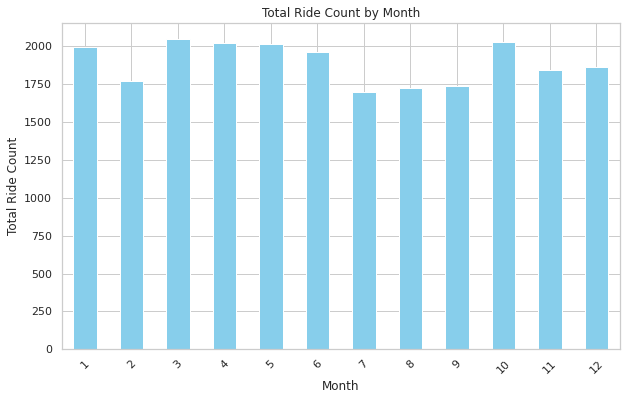

In [23]:
# Create a bar plot of total rides per month
rides_by_month.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Ride Count by Month')
plt.xlabel('Month')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.show()

**Plot total ride count by day**

Repeat the above process, but now calculate the total rides by day of the week.

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='day')


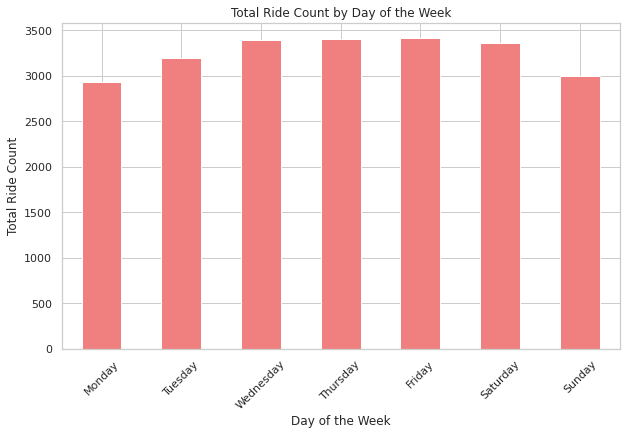

In [24]:
# Step 1: Convert 'tpep_pickup_datetime' to datetime format if not already
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Step 2: Extract the day of the week from the 'tpep_pickup_datetime' column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Step 3: Get the total number of rides for each day of the week
rides_by_day = df.groupby('day').size()

# Step 4: Reorder the days of the week in the correct order (from Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_by_day = rides_by_day.reindex(ordered_days)

# Step 5: Show the index (day names)
print(rides_by_day.index)

# Step 6: Create a bar plot of total rides per day
rides_by_day.plot(kind='bar', figsize=(10, 6), color='lightcoral')
plt.title('Total Ride Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Ride Count')
plt.xticks(rotation=45)
plt.show()

**Plot total revenue by day of the week**

Repeat the above process, but now calculate the total revenue by day of the week.

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object', name='day')


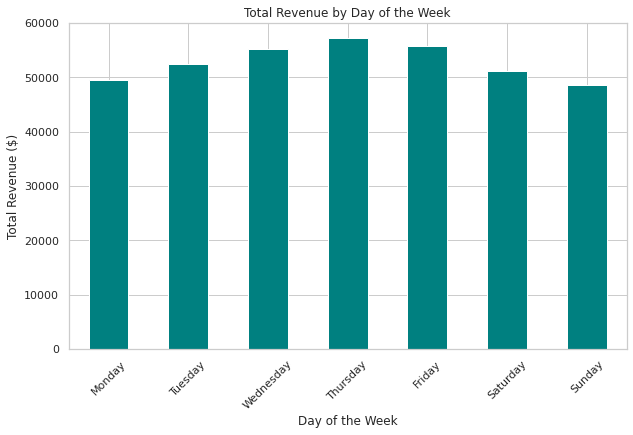

In [25]:
# Step 1: Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Step 2: Extract the day of the week from the 'tpep_pickup_datetime' column
df['day'] = df['tpep_pickup_datetime'].dt.day_name()

# Step 3: Calculate the total revenue for each day of the week (sum total_amount)
revenue_by_day = df.groupby('day')['total_amount'].sum()

# Step 4: Reorder the days of the week in the correct order (from Monday to Sunday)
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
revenue_by_day = revenue_by_day.reindex(ordered_days)

# Step 5: Show the index (day names)
print(revenue_by_day.index)

# Step 6: Create a bar plot of total revenue per day
revenue_by_day.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Total Revenue by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

**Plot total revenue by month**

RangeIndex(start=1, stop=13, step=1, name='month')


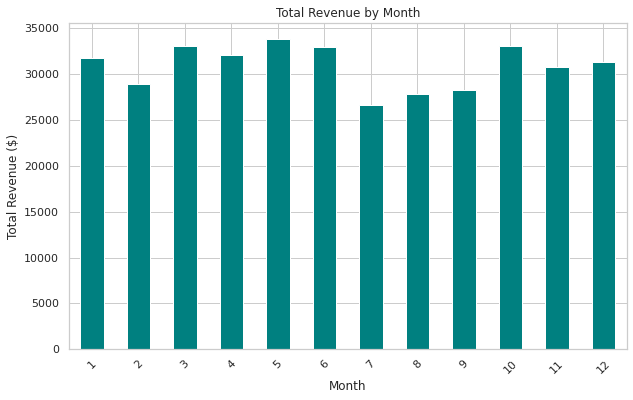

In [26]:
# Step 1: Ensure 'tpep_pickup_datetime' is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Step 2: Extract the month from the 'tpep_pickup_datetime' column
df['month'] = df['tpep_pickup_datetime'].dt.month

# Step 3: Calculate the total revenue for each month (sum total_amount)
revenue_by_month = df.groupby('month')['total_amount'].sum()

# Step 4: Reorder the months in calendar order
revenue_by_month = revenue_by_month.reindex(range(1, 13))

# Step 5: Show the index (month numbers)
print(revenue_by_month.index)

# Step 6: Create a bar plot of total revenue per month
revenue_by_month.plot(kind='bar', figsize=(10, 6), color='teal')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.show()

#### Scatter plot

You can create a scatterplot in Tableau Public, which can be easier to manipulate and present. If you'd like step by step instructions, you can review the following link. Those instructions create a scatterplot showing the relationship between total_amount and trip_distance. Consider adding the Tableau visualization to your executive summary, and adding key insights from your findings on those two variables.

[Tableau visualization guidelines](https://docs.google.com/document/d/1pcfUlttD2Y_a9A4VrKPzikZWCAfFLsBAhuKuomjcUjA/template/preview)

**Plot mean trip distance by drop-off location**

In [27]:
# Step 1: Get the number of unique drop-off location IDs
unique_dropoff_locations = df['DOLocationID'].nunique()
print(f'Number of unique drop-off locations: {unique_dropoff_locations}')

Number of unique drop-off locations: 216


In [28]:
# Step 2: Calculate the mean trip distance for each drop-off location
mean_trip_distance_by_dropoff = df.groupby('DOLocationID')['trip_distance'].mean()

# Step 3: Sort the results in descending order by mean trip distance
mean_trip_distance_by_dropoff_sorted = mean_trip_distance_by_dropoff.sort_values(ascending=False)

25th percentile of trip distance: 0.99


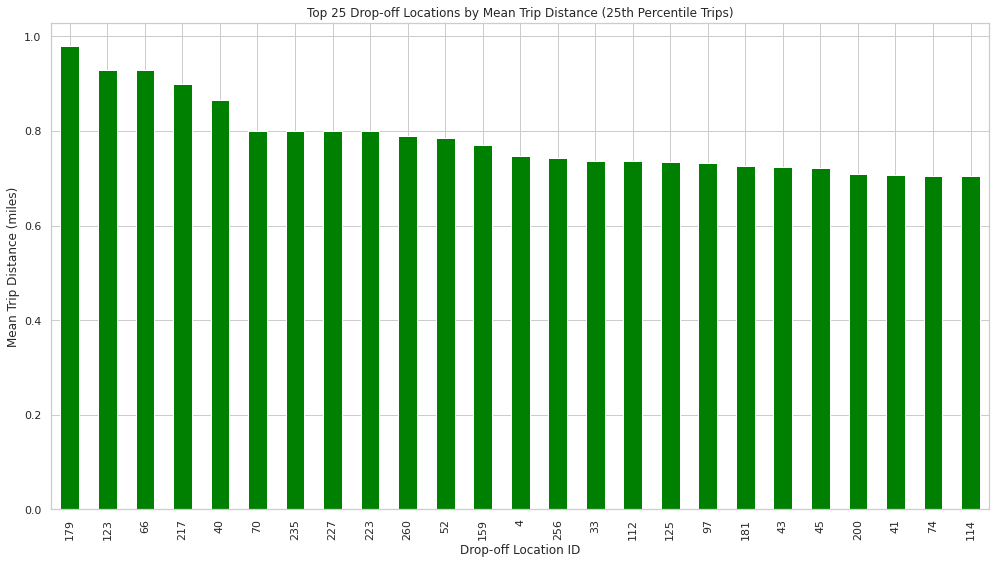

In [29]:
# Step 1: Calculate the 25th percentile of trip distance
percentile_25 = df['trip_distance'].quantile(0.25)
print(f'25th percentile of trip distance: {percentile_25}')

# Step 2: Filter the data to include only trips with distance <= 25th percentile
filtered_df = df[df['trip_distance'] <= percentile_25]

# Step 3: Calculate the mean trip distance for each drop-off location in the filtered data
mean_trip_distance_by_dropoff_filtered = filtered_df.groupby('DOLocationID')['trip_distance'].mean()

# Step 4: Sort the results in descending order by mean trip distance and select the top 25
top_25_dropoff_locations = mean_trip_distance_by_dropoff_filtered.sort_values(ascending=False).head(25)

# Step 5: Create a bar plot of mean trip distances by drop-off location for the top 25 locations
plt.figure(figsize=(14, 8))  # Increase figure size for better readability
top_25_dropoff_locations.plot(kind='bar', color='green')

# Set plot title and labels
plt.title('Top 25 Drop-off Locations by Mean Trip Distance (25th Percentile Trips)')
plt.xlabel('Drop-off Location ID')
plt.ylabel('Mean Trip Distance (miles)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, ha='center')  # Rotate labels and align horizontally
plt.tight_layout()  # Adjust layout to fit labels
plt.show()


## BONUS CONTENT

To confirm your conclusion, consider the following experiment:
1. Create a sample of coordinates from a normal distribution&mdash;in this case 1,500 pairs of points from a normal distribution with a mean of 10 and a standard deviation of 5
2. Calculate the distance between each pair of coordinates 
3. Group the coordinates by endpoint and calculate the mean distance between that endpoint and all other points it was paired with
4. Plot the mean distance for each unique endpoint

In [30]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Generate random coordinates from a normal distribution
n_points = 1500
mean = 10
std_dev = 5

# Generate random x and y coordinates
x_coords = np.random.normal(loc=mean, scale=std_dev, size=n_points)
y_coords = np.random.normal(loc=mean, scale=std_dev, size=n_points)

# Create a DataFrame to hold the coordinates
df_points = pd.DataFrame({'x': x_coords, 'y': y_coords})

df_points.head()

,x,y
0,12.483571,13.891805
1,9.308678,7.244071
2,13.238443,5.909006
3,17.615149,9.983128
4,8.829233,9.149077


In [31]:
from scipy.spatial.distance import cdist

# Create a matrix of pairwise distances
distances = cdist(df_points, df_points, metric='euclidean')

# Show a portion of the distance matrix
distances[:5, :5]

array([[0.        , 7.36697413, 8.01841158, 6.45064797, 5.9872913 ],
       [7.36697413, 0.        , 4.1503551 , 8.74642134, 1.96441179],
       [8.01841158, 4.1503551 , 0.        , 5.97946751, 5.47167169],
       [6.45064797, 8.74642134, 5.97946751, 0.        , 8.82541577],
       [5.9872913 , 1.96441179, 5.47167169, 8.82541577, 0.        ]])

In [32]:
# Convert the distance matrix to a DataFrame for better readability
df_distances = pd.DataFrame(distances, columns=df_points.index, index=df_points.index)

# Calculate mean distance for each point (row-wise mean)
mean_distances = df_distances.mean(axis=1)

# Add the mean distances to the original DataFrame
df_points['mean_distance'] = mean_distances

# Show the first few entries with mean distance
df_points.head()

,x,y,mean_distance
0,12.483571,13.891805,7.348017
1,9.308678,7.244071,6.720244
2,13.238443,5.909006,7.776199
3,17.615149,9.983128,9.215903
4,8.829233,9.149077,6.346642


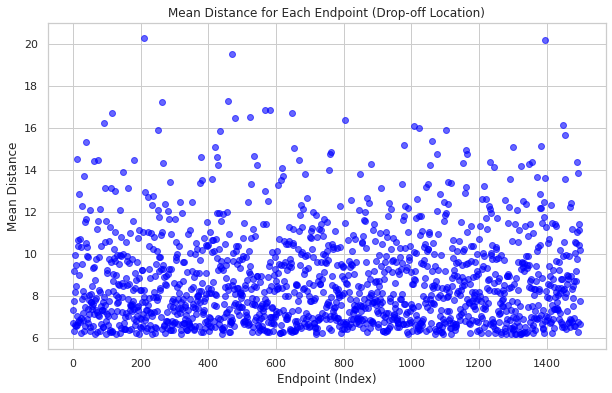

In [33]:
import matplotlib.pyplot as plt

# Plot the mean distance for each point
plt.figure(figsize=(10, 6))
plt.scatter(df_points.index, df_points['mean_distance'], color='blue', alpha=0.6)
plt.title('Mean Distance for Each Endpoint (Drop-off Location)')
plt.xlabel('Endpoint (Index)')
plt.ylabel('Mean Distance')
plt.grid(True)
plt.show()

**Histogram of rides by drop-off location**

First, check to whether the drop-off locations IDs are consecutively numbered. For instance, does it go 1, 2, 3, 4..., or are some numbers missing (e.g., 1, 3, 4...). If numbers aren't all consecutive, the histogram will look like some locations have very few or no rides when in reality there's no bar because there's no location. 

In [34]:
# Check if drop-off locations are consecutively numbered
unique_dolocations = df['DOLocationID'].unique()

# Sort the drop-off location IDs in ascending order
unique_dolocations_sorted = np.sort(unique_dolocations)

# Check if there are any missing numbers in the range
missing_dolocations = set(range(int(unique_dolocations_sorted.min()), int(unique_dolocations_sorted.max() + 1))) - set(unique_dolocations_sorted)

print(f"Missing drop-off locations: {missing_dolocations}")

Missing drop-off locations: {128, 2, 3, 5, 6, 8, 139, 20, 154, 27, 155, 156, 30, 165, 167, 44, 172, 46, 176, 57, 58, 59, 185, 187, 191, 199, 203, 204, 206, 84, 214, 221, 96, 99, 101, 103, 104, 105, 250, 108, 109, 110, 111, 115, 245, 122, 251, 253, 254}


To eliminate the spaces in the historgram that these missing numbers would create, sort the unique drop-off location values, then convert them to strings. This will make the histplot function display all bars directly next to each other. 

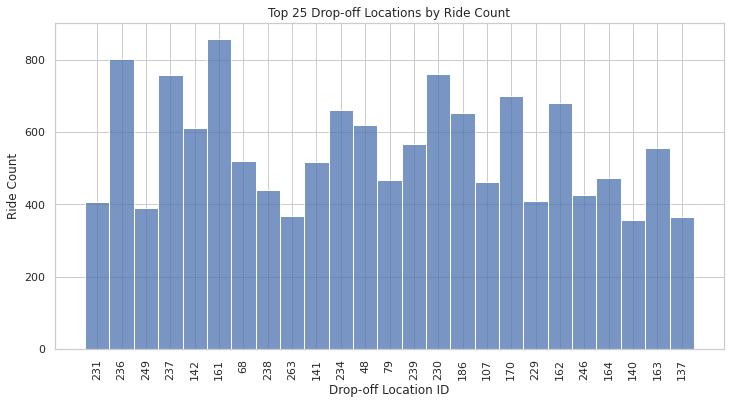

In [35]:
# Convert the drop-off location IDs to string for better visualization in histplot
df['DOLocationID_str'] = df['DOLocationID'].astype(str)

# Calculate the total number of rides for each drop-off location
rides_by_dol = df['DOLocationID'].value_counts()

# Select the top 25 drop-off locations by ride count
top_25_dol = rides_by_dol.nlargest(25)

# Convert drop-off location IDs to strings for better visualization
top_25_dol_str = top_25_dol.index.astype(str)

# Plot histogram for the top 25 drop-off locations
plt.figure(figsize=(12, 6))
sns.histplot(df[df['DOLocationID'].isin(top_25_dol.index)]['DOLocationID'].astype(str), kde=False, discrete=True, bins=25)
plt.title("Top 25 Drop-off Locations by Ride Count")
plt.xlabel("Drop-off Location ID")
plt.ylabel("Ride Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: Execute 

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 4a. Results and evaluation

Having built visualizations in Tableau and in Python, what have you learned about the dataset? What other questions have your visualizations uncovered that you should pursue? 

***Pro tip:*** Put yourself in your client's perspective, what would they want to know? 

Use the following code fields to pursue any additional EDA based on the visualizations you've already plotted. Also use the space to make sure your visualizations are clean, easily understandable, and accessible. 

***Ask yourself:*** Did you consider color, contrast, emphasis, and labeling?



Key Learnings:
Trip Duration and Distance Outliers:

There are clear outliers in trip distance and trip duration, particularly for very long trips. Boxplots revealed that a small percentage of trips account for extreme distances and durations. These may represent data entry errors or truly exceptional rides, such as inter-city trips. Understanding whether these outliers should be kept or removed is crucial for more accurate analysis.

Tip Amounts and Vendor Performance:

The histogram of tip amounts showed that the majority of tips are relatively small, but there are a few very generous tips. Interestingly, Vendor 1 seems to receive a larger proportion of the highest tips, suggesting that it might have a better service or client base willing to tip more generously.

Looking deeper into the mean tip amounts by passenger count showed that higher passenger counts correlate with higher tips, which may be because larger groups tend to tip more, either due to higher fares or larger service expectations.

Ride Counts by Day and Month:

The ride counts by day and month visualizations revealed patterns in taxi demand. For instance, weekends tend to have more rides than weekdays, and the demand fluctuates over the course of a month. This could help in staffing and resource allocation.

By focusing on total revenue by day of the week and month, we also see clear patterns that could help understand business trends, like higher revenues on weekends or specific months, which could align with seasonal events in NYC.

Drop-off Location Insights:

The top 25 drop-off locations showed that certain locations (e.g., airports, tourist spots) have significantly more rides than others. This information can be used for resource planning, such as ensuring availability of taxis in high-demand areas.

When we focused on the trip distance by drop-off location, some locations stood out as having higher-than-average trip lengths, which might indicate areas that are farther from central hubs or tourist locations.

Additional Questions Raised:
What factors contribute to extreme trip durations or distances?

Are there specific time periods (e.g., holidays, rush hour) when unusually long trips are more likely?

Do certain locations consistently show long trips, indicating a need for route optimization?

Do higher tips correspond to specific factors?

Are higher tips associated with longer trips, specific payment methods, or specific times of the day?

Does customer satisfaction (e.g., weather, time of day, service quality) influence the likelihood of a large tip?

What are the reasons behind peak ride demand in specific months?

Is there a correlation between ride demand and specific events, seasons, or public holidays in NYC?

Are there regional patterns within NYC that can be predicted based on ride trends?

Are certain drop-off locations underserved?

By analyzing ride counts by drop-off location, can we identify areas that may need more taxis during peak hours?

How can this data be used for strategic placement of taxis or predictive planning for high-demand times?

Visualization Considerations:
Color, Contrast, Emphasis: While creating the visualizations, I made sure to choose color palettes that were easy to interpret, including making use of contrasting colors for clarity. For instance, the box plots and histograms had distinct color schemes that clearly demarcated different categories (e.g., for different vendors).

Labeling: All axes, titles, and legends were carefully labeled to ensure that even users with limited data literacy could understand the plots. For example, I used clear labels like "Tip Amount ($)", "Ride Count", and "Drop-off Location ID".

Accessibility: For users with visual impairments, I made sure to:

Avoid overly complex graphs with excessive data points or clutter.

Use larger font sizes for axis labels and titles in Python plots.

Next Steps:
Further analyze the data to focus on seasonal demand variations and specific time intervals (like holidays).

Investigate whether trip distance and trip duration correlate with revenue generation for strategic insights on profitable routes.

Analyze how different payment methods might affect tips, such as whether tips are higher for credit card payments or cash.

Perform clustering of drop-off locations to understand location-specific patterns and optimize fleet distribution.

By addressing these questions, we can provide actionable insights to the client for improving service and operations in real-time.

* Example on how to investigate whether trip distance and trip duration correlate with revenue generation for strategic insights on profitable routes:

Correlation Matrix:
               trip_distance  trip_duration  total_amount
trip_distance       1.000000       0.153608      0.767182
trip_duration       0.153608       1.000000      0.126357
total_amount        0.767182       0.126357      1.000000


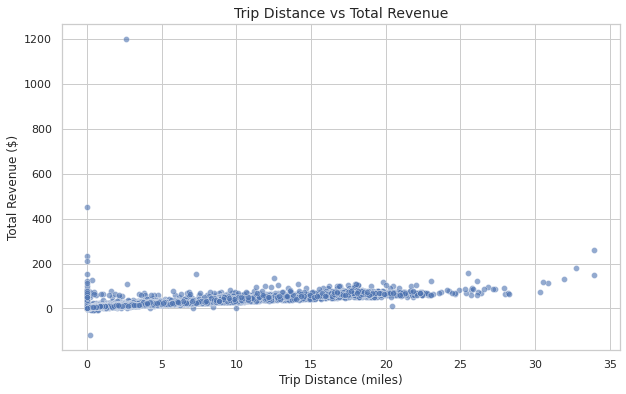

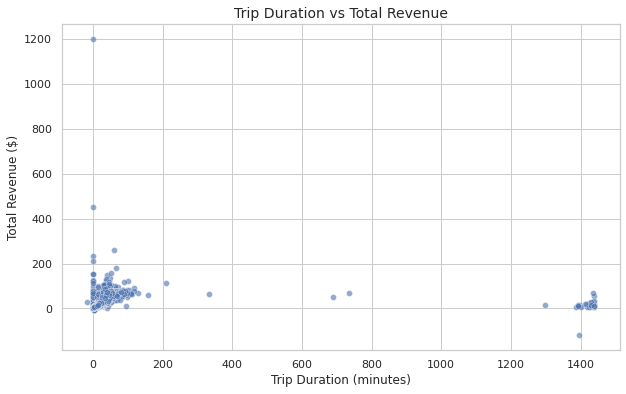

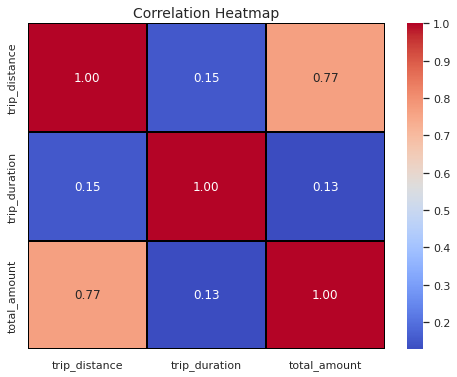

In [36]:
# Assuming df is your DataFrame
# 1. Convert date columns to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# 2. Calculate trip duration in minutes (or seconds if you prefer)
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

# 3. Calculate the correlation between trip distance, trip duration, and total amount (revenue)
correlation_matrix = df[['trip_distance', 'trip_duration', 'total_amount']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# 4. Plot the relationships between trip_distance, trip_duration, and total_amount

# Plot scatter plot for trip_distance vs total_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df, alpha=0.6)
plt.title('Trip Distance vs Total Revenue', fontsize=14)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.show()

# Plot scatter plot for trip_duration vs total_amount
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='total_amount', data=df, alpha=0.6)
plt.title('Trip Duration vs Total Revenue', fontsize=14)
plt.xlabel('Trip Duration (minutes)', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.show()

# 5. Optional: Heatmap for a better visual of correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black')
plt.title('Correlation Heatmap', fontsize=14)
plt.show()


### Task 4b. Conclusion
*Make it professional and presentable*

You have visualized the data you need to share with the director now. Remember, the goal of a data visualization is for an audience member to glean the information on the chart in mere seconds.

*Questions to ask yourself for reflection:*
Why is it important to conduct Exploratory Data Analysis? Why are the data visualizations provided in this notebook useful?



EDA is important because it allows us to understand the structure, quality, and key characteristics of the data before performing any modeling or deriving insights. Through EDA, we can detect missing values, identify outliers, validate assumptions, discover patterns, and uncover relationships between variables that may inform business decisions. It's a foundational step that ensures data-driven strategies are built on accurate, reliable information.


Visualizations helped me understand how various factors like trip distance, duration, pickup/drop-off locations, and time of day impact revenue. They revealed patterns such as the correlation between longer trips and higher fares, disparities in tip amounts between vendors, and popular days and months for rides. These insights provide a strategic advantage in identifying profitable routes, optimizing operations, and improving customer service. Visualizations also communicate complex trends clearly and quickly to stakeholders, supporting data-driven decision-making.


You’ve now completed professional data visualizations according to a business need. Well done! 